In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [5]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
x = iris.data
y = iris.target

In [7]:
x.shape

(150, 4)

In [8]:
y.shape

(150,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
dc = DecisionTreeClassifier(random_state= 1234)
model = dc.fit(x_train,y_train)

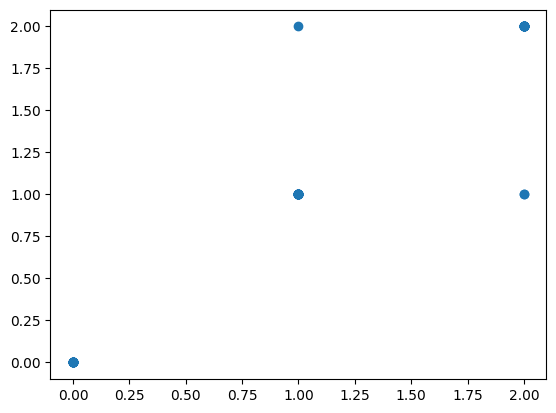

In [12]:
pred=model.predict(x_test)
plt.scatter(y_test,pred)

In [13]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(y_test,pred)
print(cm)

[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]


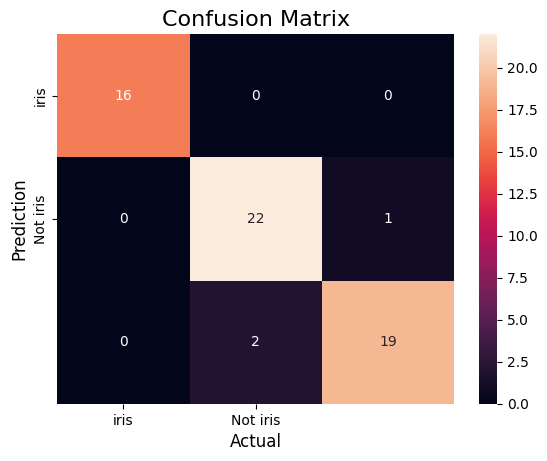

In [14]:
#hearmap
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels = ['iris','Not iris'],
    yticklabels = ['iris','Not iris']
)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



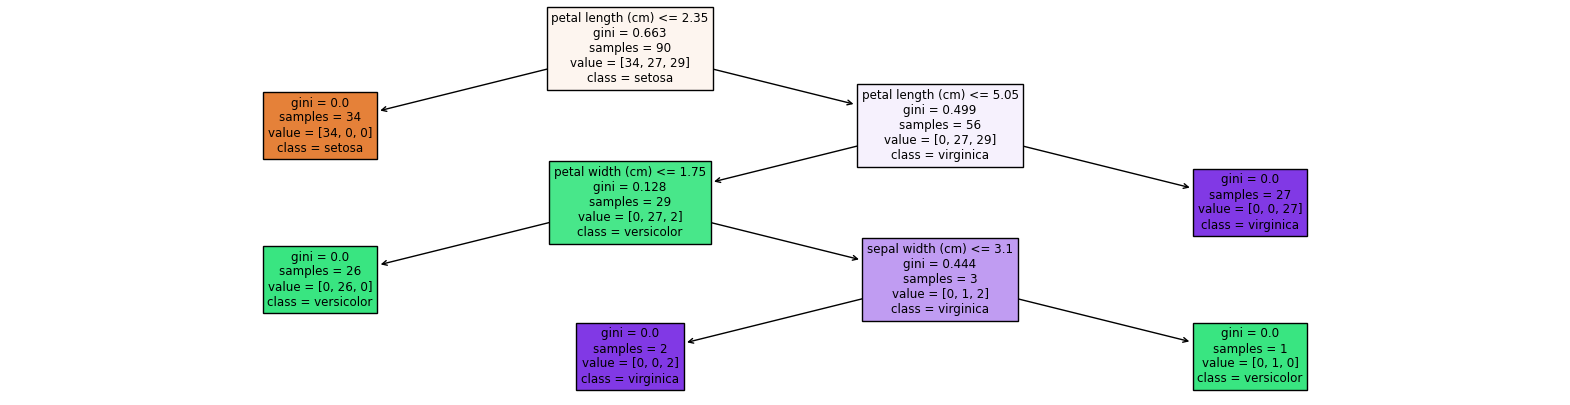

In [16]:
fig=plt.figure(figsize=(20,5))
fig=tree.plot_tree(dc,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True
)

Using PCA


In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [19]:
df=pd.DataFrame(iris['data'],columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [22]:
scaled_data = scaler.transform(df)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [24]:
x_pca = pca.transform(scaled_data)

In [25]:
scaled_data.shape

(150, 4)

In [26]:
x_pca.shape

(150, 2)

Text(0, 0.5, 'second principle component')

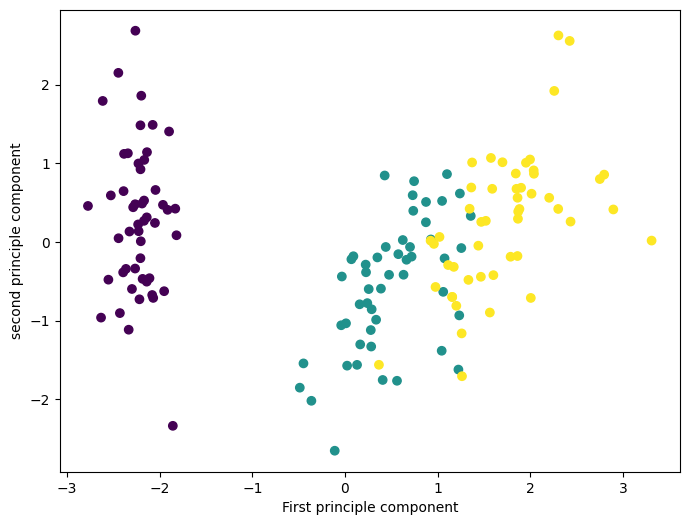

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,-1],c=iris['target'])
plt.xlabel("First principle component")
plt.ylabel("second principle component")

In [28]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [29]:
df_comp = pd.DataFrame(pca.components_,columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
x=x_pca
y=iris.target

In [31]:
x.shape

(150, 2)

In [32]:
y.shape

(150,)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [34]:
clf=DecisionTreeClassifier(random_state=1234)
model=clf.fit(x_train,y_train)

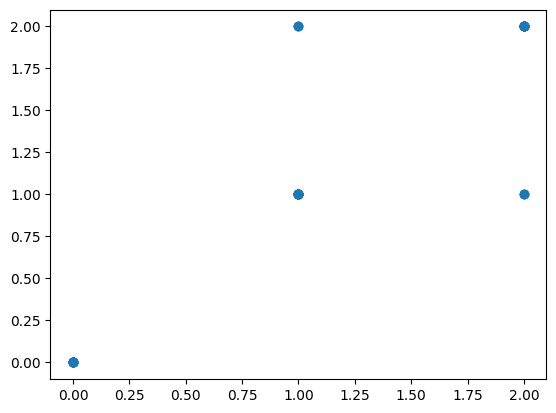

In [35]:
pred=model.predict(x_test)
plt.scatter(y_test,pred)

[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]


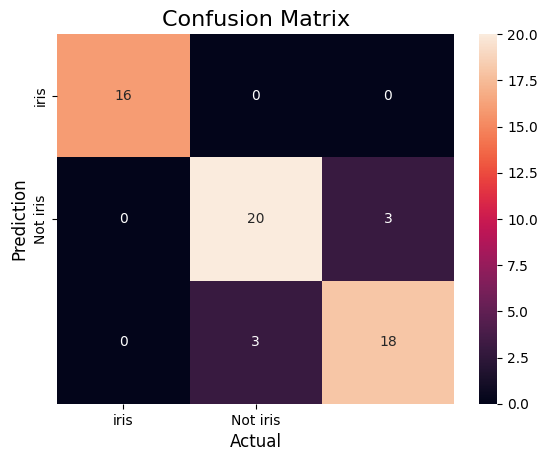

In [36]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['iris','Not iris'],
            yticklabels=['iris','Not iris'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.87      0.87        23
           2       0.86      0.86      0.86        21

    accuracy                           0.90        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.90      0.90      0.90        60



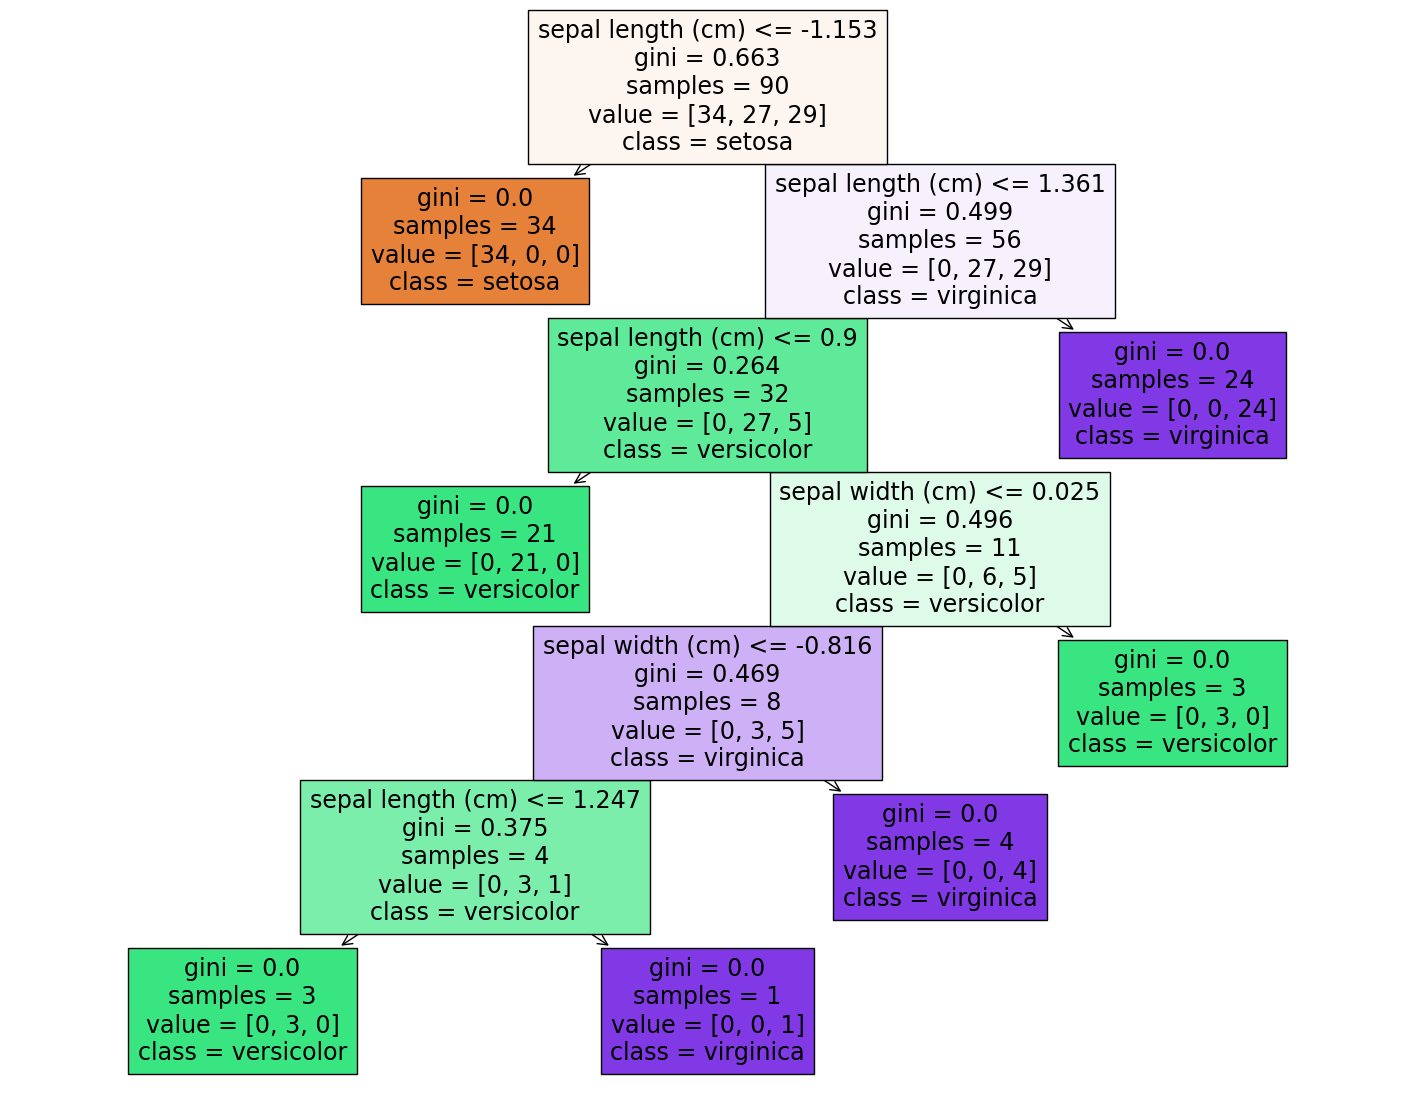

In [38]:
fig=plt.figure(figsize=(18,14))
fig=tree.plot_tree(clf,
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                filled=True)